# <center> EDA-5. Проектирование экспериментов

In [49]:
# Импорты

import pandas as pd
from matplotlib import pyplot as plt
import logging
import os

#Другой вариант сбросить настройки logging — воспользоваться функцией reload() из вспомогательной системной библиотеки importlib:
from importlib import reload

from get_logger import get_logger
import comet_ml

### Чуть больше начальной информации можно найти в noshowappintments.ipynb

In [50]:
#Смена конфигурации логгера

#При данной настройке отображаются сообщения уровня DEBUG и выше
logging.basicConfig(level=logging.DEBUG)

In [51]:
#Установка формата логирования
reload(logging)
logging.basicConfig(
    format="%(levelname)s: %(asctime)s: %(message)s",
    level=logging.DEBUG
)
logging.info('Check')

INFO: 2024-09-10 14:23:20,266: Check


In [52]:
df = pd.read_csv('data/KaggleV2-May-2016.csv')

df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No-show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64

Кто не появляется чаще?


Gender
F    0.653882
M    0.346118
Name: proportion, dtype: float64

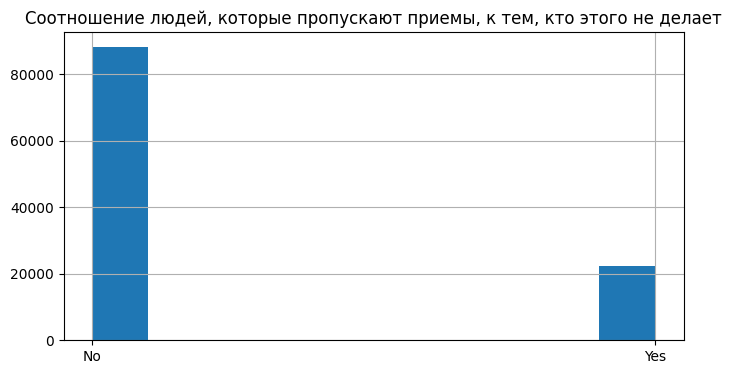

In [54]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

display(df['No-show'].value_counts(True))

print('Кто не появляется чаще?')
display(df[df['No-show']=='Yes']['Gender'].value_counts(True))

## <center> Предобработка данных

In [55]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

In [56]:
# Поиск нулевых значений

df.isnull().sum()
# Их нет

DEBUG: 2024-09-10 14:23:20,529: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/metric HTTP/1.1" 200 55


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [57]:
logger = get_logger(path='logs/', file='data.logs')

logger.info('Data')
logger.info(f'Data shape {df.shape}')
logger.info(f'Percentage of women: {df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]}')
logger.info(f'Percentage of men: {df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]}')

if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

INFO: 2024-09-10 14:23:20,537: Data
INFO: 2024-09-10 14:23:20,538: Data shape (110527, 14)
DEBUG: 2024-09-10 14:23:20,538: Resetting dropped connection: www.comet.com
C:\Users\telis\AppData\Local\Temp\ipykernel_133016\1980803448.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info(f'Percentage of women: {df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]}')
INFO: 2024-09-10 14:23:20,546: Percentage of women: 0.653882342398853
C:\Users\telis\AppData\Local\Temp\ipykernel_133016\1980803448.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info(f'Percentage of men: {df[df['No-show']=='Yes']['Gen

In [58]:
# Создайте эксперимент с помощью вашего API ключа
experiment = comet_ml.Experiment(
    api_key="JRxS2K2PZM066c1k7z5fPeZb3",
    project_name="medical-appointment",
    workspace="elancinos"
)


DEBUG: 2024-09-10 14:23:20,556: No INI file found: []
DEBUG: 2024-09-10 14:23:20,556: No INI file found: ['./.comet.config']
DEBUG: 2024-09-10 14:23:20,556: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2024-09-10 14:23:20,557: No INI file found: ['~/.comet.config']
DEBUG: 2024-09-10 14:23:20,557: Looking up key: disable, namespace: ['comet', 'auto_log']
DEBUG: 2024-09-10 14:23:20,557: Searching <ConfigOSEnv> for COMET_AUTO_LOG_DISABLE
DEBUG: 2024-09-10 14:23:20,558: Searching <ConfigEnvFileEnv: None> for COMET_AUTO_LOG_DISABLE
DEBUG: 2024-09-10 14:23:20,558: Searching <ConfigDictEnv: {}> for COMET_AUTO_LOG_DISABLE
DEBUG: 2024-09-10 14:23:20,558: Found nothing--returning NO_VALUE
DEBUG: 2024-09-10 14:23:20,559: Looking up key: url_override, namespace: ['comet']
DEBUG: 2024-09-10 14:23:20,559: Searching <ConfigOSEnv> for COMET_URL_OVERRIDE
DEBUG: 2024-09-10 14:23:20,559: Searching <ConfigEnvFileEnv: None> for COMET_URL_OVERRIDE
DEBUG: 2024-09-10 14:23:20,560: Search

In [59]:
experiment.end()

COMET INFO: The process of logging environment details (conda environment, git patch) is underway. Please be patient as this may take some time.
DEBUG: 2024-09-10 14:23:24,390: https://www.comet.com:443 "POST /api/rest/v2/write/experiment/file-path HTTP/1.1" 200 55
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : legal_range_1933
COMET INFO:     url                   : https://www.comet.com/elancinos/medical-appointment/43973bb4378e4278b10badd1ac3015a6
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (2.12 KB)
COMET INFO:     installed packages   

DEBUG: 2024-09-10 14:23:25,426: No INI file found: []
DEBUG: 2024-09-10 14:23:25,427: No INI file found: []
DEBUG: 2024-09-10 14:23:25,428: No INI file found: ['./.comet.config']
DEBUG: 2024-09-10 14:23:25,428: No INI file found: []
DEBUG: 2024-09-10 14:23:25,428: No INI file found: ['./.comet.config']
DEBUG: 2024-09-10 14:23:25,429: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2024-09-10 14:23:25,430: No INI file found: ['./.comet.config']
DEBUG: 2024-09-10 14:23:25,430: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2024-09-10 14:23:25,430: No INI file found: ['~/.comet.config']
DEBUG: 2024-09-10 14:23:25,431: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2024-09-10 14:23:25,431: No INI file found: ['~/.comet.config']
DEBUG: 2024-09-10 14:23:25,431: Looking up key: name, namespace: ['comet', 'allow_header']
DEBUG: 2024-09-10 14:23:25,432: No INI file found: ['~/.comet.config']
DEBUG: 2024-09-10 14:23:25,432: Looking up ke